### <center>Applying basic preprocessing anomaly filters.</center>
#####           <center>(Using mainly the zWarning parameter given by SDSS(DR15))</center>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
data = pd.read_csv('DataDR15.csv')

In [ ]:
data.shape

(2697380, 26)

In [ ]:
data['CountR'] = 0

In [ ]:
dataE = data[data['zWarning']!=0]
dataE['CountR'] = 1

/home/gautham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataE.shape

(117393, 27)

In [ ]:
# data[data['CountR']>0]

In [ ]:
dataE.head()

,Unnamed: 0,specObjID,objid,ra,dec,specz,specz_err,dered_u,dered_g,dered_r,...,petroRad_r,petroRadErr_r,specType,photpType,zWarning,color_gi,color_gr,color_ri,color_zr,CountR
211,211,6.692422e+18,1237651190815129706,119.319960,40.849919,0.532519,0.000318,25.04828,22.33701,21.17239,...,7.359574,-1000.000000,LRG,3,4,2.32515,1.16462,1.16053,-0.90681,1
242,242,6.692457e+18,1237651191351869984,118.696709,40.826213,0.488876,0.000258,25.24378,22.96475,20.90699,...,2.744931,0.748331,LRG,3,4,3.09997,2.05776,1.04221,-1.36940,1
294,294,7.663085e+18,1237651249895965175,220.382869,59.067943,0.000000,0.000000,23.03623,20.49071,18.70774,...,6.128214,0.743052,LRG,3,646,2.39208,1.78297,0.60911,-1.09619,1
317,317,3.245970e+18,1237651249898455214,228.990758,55.735296,0.000000,0.000000,19.66568,18.30757,17.53972,...,4.593143,0.223466,QA,3,134,1.19454,0.76785,0.42669,-0.70761,1
355,355,6.692412e+18,1237651250406228791,119.549790,40.947510,0.708250,0.000159,22.60991,21.98940,20.62056,...,3.311533,1.636708,LRG,3,4,2.60327,1.36884,1.23443,-1.89998,1


In [ ]:
dataE.drop('Unnamed: 0', axis = 1, inplace = True)

/home/gautham/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dataE.head()

,specObjID,objid,ra,dec,specz,specz_err,dered_u,dered_g,dered_r,dered_i,...,petroRad_r,petroRadErr_r,specType,photpType,zWarning,color_gi,color_gr,color_ri,color_zr,CountR
211,6.692422e+18,1237651190815129706,119.319960,40.849919,0.532519,0.000318,25.04828,22.33701,21.17239,20.01186,...,7.359574,-1000.000000,LRG,3,4,2.32515,1.16462,1.16053,-0.90681,1
242,6.692457e+18,1237651191351869984,118.696709,40.826213,0.488876,0.000258,25.24378,22.96475,20.90699,19.86478,...,2.744931,0.748331,LRG,3,4,3.09997,2.05776,1.04221,-1.36940,1
294,7.663085e+18,1237651249895965175,220.382869,59.067943,0.000000,0.000000,23.03623,20.49071,18.70774,18.09863,...,6.128214,0.743052,LRG,3,646,2.39208,1.78297,0.60911,-1.09619,1
317,3.245970e+18,1237651249898455214,228.990758,55.735296,0.000000,0.000000,19.66568,18.30757,17.53972,17.11303,...,4.593143,0.223466,QA,3,134,1.19454,0.76785,0.42669,-0.70761,1
355,6.692412e+18,1237651250406228791,119.549790,40.947510,0.708250,0.000159,22.60991,21.98940,20.62056,19.38613,...,3.311533,1.636708,LRG,3,4,2.60327,1.36884,1.23443,-1.89998,1


* Some galaxies may have multiple spectra, find those and check for galaxies with  poorly measured redshift>0 and well measured redshift with err<0.001

*  "Of these galaxies 9115 galaxies have both a poorly measured spectroscopic redshift above 0, and a well measured spectroscopic redshift with an error less than 0.001."<center>

* "We next select galaxies which have a difference in poorly measured and well measured redshifts to be greater than 0.01 resulting in 6734 galaxies of which 3502 are unique."

<center>Quoted from <a href="https://arxiv.org/abs/1503.08214">Hoyle et al</a></center>

In [ ]:
print(dataE.shape[0], 'and', dataE['objid'].nunique())

117393 and 112221


In [ ]:
dataE.sort_values(by=['objid'], inplace = True)

/home/gautham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataE.head()

,specObjID,objid,ra,dec,specz,specz_err,dered_u,dered_g,dered_r,dered_i,...,petroRad_r,petroRadErr_r,specType,photpType,zWarning,color_gi,color_gr,color_ri,color_zr,CountR
27315,9.064666e+17,1237645879578460507,51.475667,1.270406,1.168943,0.326111,20.69754,19.61841,19.20132,18.93900,...,5.268336,1.116978,NONLEGACY,3,4,0.67941,0.41709,0.26232,-0.26119,1
9616,8.806929e+18,1237645942898230422,40.587309,0.099694,0.688530,0.000493,22.75566,22.91782,21.67325,20.26372,...,2.969099,-1000.000000,LRG,3,4,2.65410,1.24457,1.40953,-2.31718,1
6340,2.971381e+18,1237645942904717681,55.276130,0.217559,0.508505,0.000224,22.96113,22.26789,20.74245,19.87316,...,1.989761,0.432218,NONLEGACY,3,4,2.39473,1.52544,0.86929,-1.21748,1
18486,8.810360e+18,1237645943434642261,39.450032,0.630192,1.278000,0.000053,22.81642,23.69940,21.55404,20.48479,...,18.015300,-1000.000000,LRG,3,4,3.21461,2.14536,1.06925,-1.76303,1
18487,8.810407e+18,1237645943434969995,40.285858,0.455475,0.812251,0.000457,24.73078,24.76032,21.73809,20.72943,...,7.357921,-1000.000000,LRG,3,4,4.03089,3.02223,1.00866,-1.84919,1


In [ ]:
datadupli = dataE[dataE['objid'].duplicated(False)] # datadupli contains all galaxies that have multiple specz readings for the same galaxy

In [ ]:
datadupli.shape

(9393, 26)

In [ ]:
datadupli['objid'].nunique()

4221

In [ ]:
obj1 = []
for a, b in np.array(datadupli[['specz_err', 'objid']]):
    if a<=0.001:
        obj1.append(b)
# Object IDs for all galaxies with atleast 1 specz_err<0.001 ie: well measured specz.

In [ ]:
pd.DataFrame(obj1).nunique()
# 3831 Galaxies with atleast 1 well measured specz.

0    3831
dtype: int64

* To do : Take components in objid and see if the same obj id gives diff in poorly and well measured specz is >0.01

In [ ]:
datadupli[datadupli['specz_err']<0.001]['specz_err']

25341      0.000194
6583       0.000010
6582       0.000140
6591       0.000322
6597       0.000751
             ...   
2611369    0.000187
2415440    0.000203
2415439    0.000741
2586322    0.000530
2586323    0.000246
Name: specz_err, Length: 7822, dtype: float64

In [ ]:
s = []

for a in obj1:
    # Matches specz in well measured set with specz in set of all duplicates.
    for b in np.array(datadupli[(datadupli['objid'] == a) & (datadupli['specz_err']<0.001)]['specz']):  
        # Take a well measured specz and compare with other duplicates, if delta(specz)>0.01,
        # then the other specz is unreliable, add it to list 's' and remove all other occurances 
        # of elements in obj1
        for c in np.array(datadupli[datadupli['objid'] == a]['specz']):
            if abs(b-c) >= 0.01:
                s.append([a,c])
# s has all unreliable [objid,specz]

In [ ]:
# print(datadupli[datadupli['objid'] == s[3][0]]['specz'])
# print(s[3][1])
s = pd.DataFrame(s, columns=['objid', 'specz'])
s

,objid,specz
0,1.237646e+18,1.049043
1,1.237646e+18,0.683723
2,1.237646e+18,-0.010193
3,1.237646e+18,0.845631
4,1.237646e+18,3.657077
...,...,...
75909,1.237681e+18,0.426342
75910,1.237681e+18,0.001161
75911,1.237681e+18,0.588752
75912,1.237681e+18,0.001161


* s contains all galaxies which have difference in specz >0.01 with atleast one galaxy with  specz_err<0.001 with repetitions -> All unreliable galaxies -> CountR = 2

In [ ]:
for a,b in np.array(s):
        dataE.loc[(dataE['objid'] == a)&(dataE['specz'] == b), 'CountR'] = 2

/home/gautham/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
Full_Reliable = data[data['zWarning']==0]
Reliable = dataE[dataE['CountR'] == 1]
Unreliable = dataE[dataE['CountR'] == 2]

In [ ]:
# Cleaning
Unreliable = Unreliable.drop_duplicates(subset = ['objid'])
Reliable = Reliable.drop_duplicates(subset = ['objid'])
Full_Reliable = Full_Reliable.drop_duplicates(subset = ['objid'])

* #### Making all 3 sets completely disjoint.
* ####  [!Takes a large time to run]

In [ ]:
for a in np.array(Unreliable['objid']):
    Reliable.drop(Reliable[Reliable['objid']==a].index, inplace = True)
    Full_Reliable.drop(Full_Reliable[Full_Reliable['objid']==a].index, inplace = True)

*  Unnecessary step below, do not need to run.

In [ ]:
# for a in np.array(Reliable['objid']):
#     Full_Reliable.drop(Full_Reliable[Full_Reliable['objid']==a].index, inplace = True)

In [ ]:
print(Full_Reliable.shape, Reliable.shape, Unreliable.shape)

(2359026, 27) (109795, 26) (2426, 26)


An interesting point to note here is that using the same querying conditions in DR-10, we see
<br>
* Less Galaxies/Objects(Almost the same though).
<br>
* More Unreliable readings for spectroscopic redshifts (6732 vs 2426 when compared to Hoyle et.al).

This goes on to say how significantly the DR has improved from version 10 to 12 

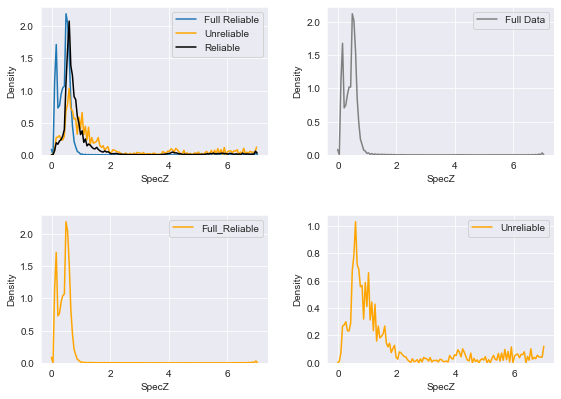

In [ ]:
from matplotlib.pyplot import figure
fig, axis = plt.subplots(2, 2)
sns.kdeplot(Full_Reliable['specz'], label = 'Full Reliable', bw = 0.0001, ax = axis[0][0])
sns.kdeplot(Unreliable['specz'], color = 'orange', label = 'Unreliable', bw = 0.0001, ax = axis[0][0])
sns.kdeplot(Reliable['specz'], color = 'black', label = 'Reliable', bw = 0.0001, ax = axis[0][0])
sns.kdeplot(data = data['specz'], label = 'Full Data', color = 'gray', bw = 0.0001, ax = axis[0][1])
sns.kdeplot(data = Full_Reliable['specz'], label = 'Full_Reliable', color = 'orange', bw = 0.0001, ax = axis[1][0])
sns.kdeplot(data = Unreliable['specz'], label = 'Unreliable', color = 'orange', bw = 0.0001, ax = axis[1][1])
axis[0][0].set_xlabel('SpecZ')
axis[0][0].set_ylabel('Density')
axis[0][1].set_xlabel('SpecZ')
axis[0][1].set_ylabel('Density')
axis[1][0].set_xlabel('SpecZ')
axis[1][0].set_ylabel('Density')
axis[1][1].set_xlabel('SpecZ')
axis[1][1].set_ylabel('Density')
plt.tight_layout()
fig.set_size_inches(8, 6)

* #### Clearly, the unreliable distribution is completely different from all others, and when compared to all other distributions and the full data, it displays quite obvious outlier/noisy behaviour.

In [ ]:
Full_Reliable.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
Full_Reliable.to_csv('Full_Rel.csv')
Reliable.to_csv('Rel.csv')
Unreliable.to_csv('Unrel.csv')